# Quantum SVM

In this project, we implement a simple Support Vector Machine Algorithm using Qiskit's QSVM module.

## Introduction
Support Vector Machines are one of the first traditional supervised learning algorithms used for classification tasks. To be more specific, they are used for fitting hyperplanes in order to separate or segregate different clusters of datapoint clouds from a distribution, in order to classify them.

However, it is not always possible to fit a hyperplane in the raw data distribution, which can efficiently segregate the clusters. Hence we apply non linear mappings to transform the raw datapoints into a distribution which can facilitate the hyperplane fitting, much easily and efficiently. This mapped space is also known as the kernel and we can think of plotting the kernel as a visual representation of distances between pairs of datapoints in the mapped space.

## Approach
We have used the inbuilt QSVM module offered by Qiskit Aqua to simulate the model. Even though, we have not implemented the model from scratch, upon reading, we understood that the baseline principle for both the classical and quantum variants of the SVM are very similar. This project is our first attempt at Quantum Machine Learning and it uses very basic datasets to train a QSVM and check the final testing accuracy.

### Group Members:
- Khurshed Fitter
- Luqman Farooqui
- Abhiprada

## Importing Reaquired Modules

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from qiskit import Aer
from qiskit.ml.datasets import ad_hoc_data, sample_ad_hoc_data, breast_cancer
from qiskit.circuit.library import ZZFeatureMap
from qiskit.aqua.utils import split_dataset_to_data_and_labels, map_label_to_class_name
from qiskit.aqua import QuantumInstance
from qiskit.aqua.algorithms import QSVM

## Loading and Visualising Data

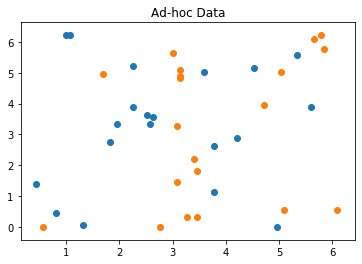

In [2]:
feature_dim = 2    # Number of input features
sample_total, train_data, test_data, labels = ad_hoc_data(training_size=20, test_size=10,
                                                         n=feature_dim, gap=0.3, plot_data=True)

## Loading Sample Data
We need to do this in order to understand how many classes are there in the dataset. Further, it also helps us understand the labels for each of the classes in the dataset.

In [3]:
sample_test_data = sample_ad_hoc_data(sample_total, 10, n=feature_dim)
data_pts, class2label = split_dataset_to_data_and_labels(sample_test_data)
print("Classes and corresponding labels are:")
for c in class2label:
    print(f"Class: {c}, Label: {class2label[c]}")

Classes and corresponding labels are:
Class: A, Label: 0
Class: B, Label: 1


## Creating Feature Map and Model

In [4]:
seed = 10598  # Setting seed to ensure reproducable results

feature_map = ZZFeatureMap(feature_dimension=feature_dim, reps=2, entanglement='linear')
qsvm = QSVM(feature_map, train_data, test_data, data_pts[0])

## Initailizing Backend and Invoking Model

In [5]:
backend = Aer.get_backend('qasm_simulator')
quantum_instance = QuantumInstance(backend, shots=1024, seed_simulator=seed, seed_transpiler=seed)

## Collecting and Displaying Results

In [6]:
result = qsvm.run(quantum_instance)

print(f"Testing Accuracy: {result['testing_accuracy'] * 100}%")
print("Prediction on Datapoints:")
print(f"Ground Truth: {map_label_to_class_name(data_pts[1], qsvm.label_to_class)}")
print(f"Predictions:  {result['predicted_classes']}")

Testing Accuracy: 100.0%
Prediction on Datapoints:
Ground Truth: ['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B']
Predictions:  ['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B']


## Displaying Feature Mapping Kernel
The collection of inner products between linear mappings of data points, onto the mapping space is called the kernel.

Trained Kernel Matrix:


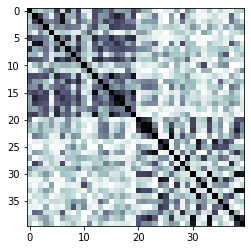

In [7]:
print("Trained Kernel Matrix:")
kernel_matrix = result['kernel_matrix_training']
img = plt.imshow(np.asmatrix(kernel_matrix),interpolation='nearest',origin='upper',cmap='bone_r')
plt.show()

## Additional:
### Breast Cancer Dataset
One can try the same procedure (as described above) on the Breast Cancer dataset.

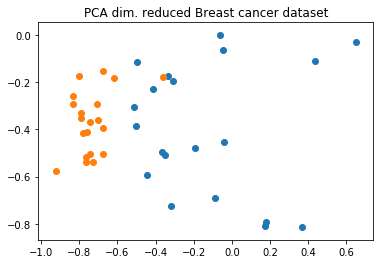

In [8]:
feature_dim = 2    # Number of input features
sample_total_bc, train_data_bc, test_data_bc, labels_bc = breast_cancer(training_size=20, test_size=10,
                                                         n=feature_dim, plot_data=True)

Since number of features in the actual dataset is more than 2, we plotted a PCA (Principal Compoenent Analysis) of the datapoints scatter.

In [9]:
seed = 10598  # Setting seed to ensure reproducable results

feature_map_bc = ZZFeatureMap(feature_dimension=feature_dim, reps=2, entanglement='linear')
qsvm_bc = QSVM(feature_map_bc, train_data_bc, test_data_bc)

In [10]:
backend = Aer.get_backend('qasm_simulator')
quantum_instance_bc = QuantumInstance(backend, shots=1024, seed_simulator=seed, seed_transpiler=seed)

In [11]:
result_bc = qsvm_bc.run(quantum_instance_bc)
print(f"Testing Accuracy: {result_bc['testing_accuracy'] * 100}%")

Testing Accuracy: 85.0%


Trained Kernel Matrix:


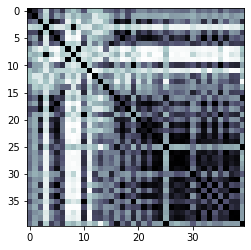

In [12]:
print("Trained Kernel Matrix:")
kernel_matrix_bc = result_bc['kernel_matrix_training']
img = plt.imshow(np.asmatrix(kernel_matrix_bc),interpolation='nearest',origin='upper',cmap='bone_r')
plt.show()